<center> <h1>Cálculo e Análise Numérico.    &nbsp;&nbsp;&nbsp;&nbsp;     Grao en Intelixencia Artificial (Uvigo) 
    <br />
    Práctica 2 &nbsp;&nbsp;&nbsp;&nbsp;  (14, 18 e 19 de novembro de 2024)<center> <h1>

# 5 Derivación Numérica. Diferencias finitas (Tema 2)

<div style="text-align: justify"> 
Neste tema veremos algúns métodos numéricos que nos permiten aproximar a derivada dunha función, $f:(a,\ b) \rightarrow \mathbb{R}$, nun punto, $x_0$, a partir dos valores da propia función. Supoñeremos que esta función é o <b>suficientemente regular</b>, isto é, que as derivadas de $f$ utilizadas para obter o método numérico existen e son continuas. O procedemento máis habitual para obter as fórmulas de aproximación numérica da derivada é empregar o polinomio de Taylor. Este tipo de fórmulas obtidas reciben o nome de <b>diferencias finitas (DF)</b>. Recordar que o polinomio de Taylor de grao $n$ asociado a unha función, $f$, centrado nun punto $c$ ten a seguinte forma:
$$
P_{n,f,c}(x):=f(c)+\frac{f'(c)}{1!}\left(x-c\right)+
                    \frac{f''(c)}{2!}\left(x-c\right)^{2}+\dots+
                    \frac{f^{(n)}(c)}{n!}\left(x-c\right)^{n}.
$$    
Se consideramos o resto de Lagrange para o polinomio de Taylor temos que:
$$
f(x)=P_{n,f,c}(x)+\frac{f^{(n+1)}(\xi)}{(n+1)!}\left(x-c\right)^{n+1}=P_{n,f,c}(x)+R_{n,f,c}(x).
$$
Habitualmente úsase a notación O grande (ou notación de Landau) para representar o erro de truncamento. Esta será a notación que usaremos, a partir de agora, para representar o resto de Lagrange do polinomio de Taylor de orde $n$, se $h=x-c$ (e $x \to c$) temos que: 
$$
R_{n,f,c}(x)=\frac{f^{(n+1)}(\xi)}{(n+1)!}h^{n+1}=O(h^{n+1}),
$$  
onde $O(h^{n+1})$ significa que o erro de truncamento do polinomio de Taylor é de orde $n+1$. 
Nos seguintes apartados construímos o polinomio de Taylor en <b>Python</b> e veremos como se deducen distintos tipos de diferencias finitas entre as que se atopan as progresivas, as regresivas e as centradas.
</div>


## Polinomio de Taylor en **Python**
<div style="text-align: justify">
A continuación cargamos os módulos de <b>Python</b> que usaremos nesta segunda práctica.
</div>

In [1]:
import numpy as np
import sympy as sp
import matplotlib as mp
import matplotlib.pyplot as plt

%matplotlib inline

Imos usar a función `series` de <b>Sympy</b> para obter o polinomio de Taylor de orde $n$ dunha función centrado en $c$. Como exemplo tomaremos $c=1$ e a función $f(x)=\ln(x)$.

O polinomio de Taylor de orde 1 (mostrando o erro de truncamento) é:


-1 + x + O((x - 1)**2, (x, 1))

O polinomio de Taylor de orde 1 (sen mostrar erro de truncamento) é:


x - 1

O polinomio de Taylor de orde 2 (mostrando o erro de truncamento) é:


-1 - (x - 1)**2/2 + x + O((x - 1)**3, (x, 1))

O polinomio de Taylor de orde 2 (sen mostrar erro de truncamento) é:


x - (x - 1)**2/2 - 1

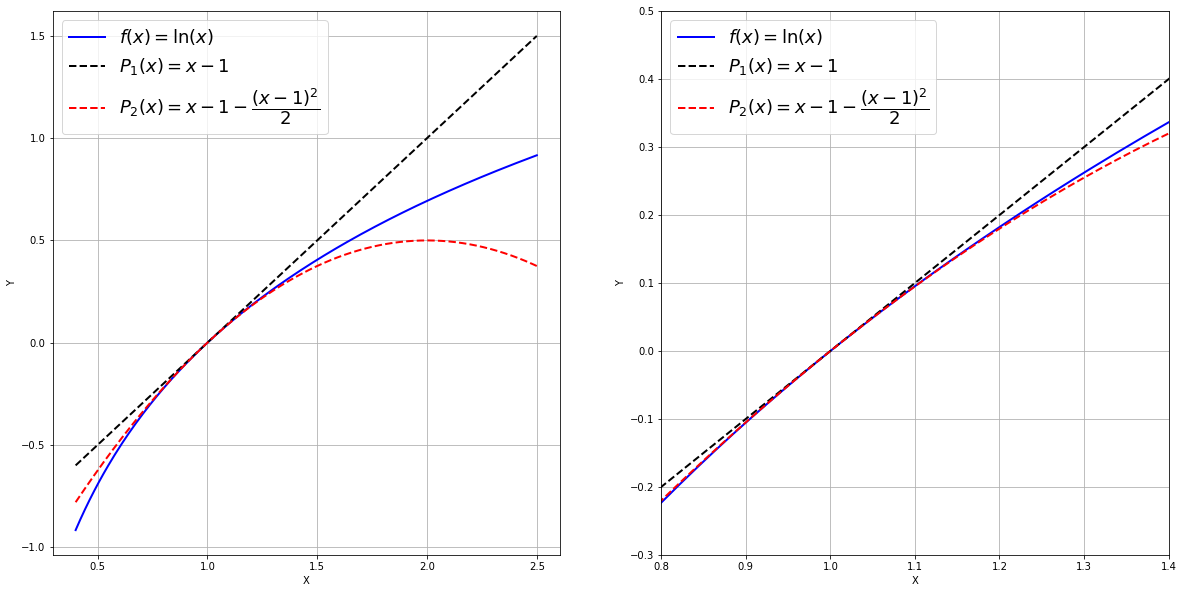

In [2]:
c = 1 # Punto no que centramos o polinomio de Taylor
x = sp.symbols('x', real=True) # Define a variable simbólica x

# Función que queremos aproximar
fx = sp.log(x)

# Calculamos o polinomio de Taylor de grao n centrado en c
n = 1 # Grao do polinomio
P1 = sp.series(fx,x,c,n+1)
print('O polinomio de Taylor de orde 1 (mostrando o erro de truncamento) é:')
display(P1) 
# A O() representa o erro de truncamento definido anteriormente. Pódese eliminar usando:
P1=P1.removeO()
print('O polinomio de Taylor de orde 1 (sen mostrar erro de truncamento) é:')
display(P1) 

# Calculamos o polinomio de Taylor de orde 2
P2 = sp.series(fx,x,c,3)
print('O polinomio de Taylor de orde 2 (mostrando o erro de truncamento) é:')
display(P2)
P2=P2.removeO()
print('O polinomio de Taylor de orde 2 (sen mostrar erro de truncamento) é:')
display(P2) 

# Debuxamos a función xunto cos polinomios de Taylor calculados
x1 = np.linspace(0.4, 2.5, 200)
y1 = np.log(x1)
# Avaliamos P1 e P2 nos puntos de x1
p1x = np.zeros(len(x1))
p2x = np.zeros(len(x1))
for k in range(len(x1)):
    p1x[k] = P1.subs({x:x1[k]})
    p2x[k] = P2.subs({x:x1[k]})
    

fig, axs = plt.subplots(1, 2, figsize=(20,10))

ax1 = axs[0]
ax1.plot(x1, y1, c='b', lw='2',  label='$f(x)=\ln(x)$')
ax1.plot(x1, p1x, c='k', ls='--', lw='2', label='$P_1(x)=x-1$')
ax1.plot(x1, p2x, c='r', ls='--', lw='2', label='$P_2(x)=x-1 - \dfrac{(x-1)^2}{2}$')
ax1.set_ylabel('Y', fontsize=10)
ax1.set_xlabel('X', fontsize=10)
ax1.grid()
ax1.legend(prop={'size': 18})


ax2 = axs[1]
ax2.plot(x1, y1, c='b', lw='2', label='$f(x)=\ln(x)$')
ax2.plot(x1, p1x, c='k', ls='--', lw='2', label='$P_1(x)=x-1$')
ax2.plot(x1, p2x, c='r', ls='--', lw='2', label='$P_2(x)=x-1 - \dfrac{(x-1)^2}{2}$')
ax2.set_ylabel('Y', fontsize=10)
ax2.set_xlabel('X', fontsize=10)
plt.xlim(0.8,1.4)
plt.ylim(-0.3,0.5)
ax2.set_xticks(np.arange(0.8,1.5,0.1))
ax2.set_yticks(np.arange(-0.3,0.6,0.1))
ax2.grid()
ax2.legend(prop={'size': 18})

### Exercicio
<div style="text-align: justify">
Usa <b>Python</b> para calcular o polinomio de Taylor de diferentes ordes para $f(x)=\sin(x)$ centrado en $c=\dfrac{\pi}{2}$. Comproba gráficamente como os polinomios de Taylor de maior orde aproximan mellor a función dada.
</div>

## Diferencias finitas para a primeira derivada.
<div style="text-align: justify">
As fórmulas de diferencias finitas dependen dos valores da función, $f(x_i)$, en distintos puntos, $x_i, \ i=0,1,\dots,n$, tal que $x_0<x_1<\dots<x_n$. Estes puntos reciben o nome de <b>nodos</b>. A partir de agora imos supoñer que están equiespaciados, é dicir, $x_i = x_0 +ih$, con $h$ constante. 
</div>

### Diferencias finitas progresivas
<div style="text-align: justify">
As diferencias finitas progresivas obtéñense a partir do polinomio de Taylor asociado á función $f$ no punto $x$ (sustituímos na anterior fórmula do polinomio de Taylor $x$ por $x+h$ e $c$ por $x$): 
    $$f(x+h) = f(x) + hf'(x) + h^2\dfrac{f''(x)}{2} + O(h^3).$$
Despexando o termo da derivada primeira na anterior expresión obtense que:
    $$f'(x)=\dfrac{f(x+h)-f(x)}{h} - \dfrac{h}{2}f''(x) + O(h^2) = \dfrac{f(x+h)-f(x)}{h} + O(h).$$
Onde $O(h)$ representa todos os termos de orde superior, en $h$, que non se utilizan para obter a aproximación. Deste xeito, se consideramos $x=x_i$, obtemos a seguinte fórmula:
    $$f'(x_i)\approx \dfrac{f(x_{i+1})-f(x_i)}{h}.$$
Nótese o parecido da anterior fórmula coa da definición da derivada:
    $$f'(x)=\lim_{h\rightarrow 0}\dfrac{f(x+h)-f(x)}{h}.$$
Vexamos a implementación en <b>Python</b> deste método.
</div>

In [3]:
def DFprogresiva(x0,f,h):
    df = (f(x0+h)-f(x0))/h
    return float(df)

# Definimos unha función
x = sp.symbols('x', real=True) 
f_expr = sp.log(x)*sp.exp(sp.sin(x))
f = sp.Lambda(x,f_expr)

# Consideramos x0=2 e h=0.1
x0 = 2 # Punto no que queremos aproximar a derivada
h = 0.1 # Paso para contruír o seguinte punto


# Calculamos a diferencia finita progresiva
dfa = DFprogresiva(x0,f,h)

# Calculamos a derivada exacta
f_der=  sp.diff(f(x),x)
df = sp.Lambda(x,f_der)

# Vexamos como ao diminuir o valor de h a aproximación é mellor
print('O valor exacto da derivada en ',x0,' é:',float(df(x0)),' e a aproximación numérica para h=', h,' é:',dfa,'\n')
print('Erro cometido: ', sp.Abs(float(df(x0))-DFprogresiva(x0,f,0.1)),'\n')
print('O valor exacto da derivada en ',x0,' é:',float(df(x0)),' e a aproximación numérica para h=', 0.01,' é:',DFprogresiva(x0,f,0.01),'\n')
print('Erro cometido: ', sp.Abs(float(df(x0))-DFprogresiva(x0,f,0.01)),'\n')
print('O valor exacto da derivada en ',x0,' é:',float(df(x0)),' e a aproximación numérica para h=', 0.001,' é:',DFprogresiva(x0,f,0.001),'\n')
print('Erro cometido: ', sp.Abs(float(df(x0))-DFprogresiva(x0,f,0.001)),'\n')

O valor exacto da derivada en  2  é: 0.5251868197672663  e a aproximación numérica para h= 0.1  é: 0.38161494494538717 

Erro cometido:  0.143571874821879 

O valor exacto da derivada en  2  é: 0.5251868197672663  e a aproximación numérica para h= 0.01  é: 0.5106049354071776 

Erro cometido:  0.0145818843600888 

O valor exacto da derivada en  2  é: 0.5251868197672663  e a aproximación numérica para h= 0.001  é: 0.5237267855956603 

Erro cometido:  0.00146003417160601 



### Diferencias finitas regresivas
<div style="text-align: justify">
As diferencias finitas regresivas obtéñense a partir do polinomio de Taylor asociado a función $f$ no punto $x$ (sustituímos na fórmula do polinomio de Taylor $x$ por $x-h$ e $c$ por $x$): 
    $$f(x-h) = f(x) - hf'(x) + h^2\dfrac{f''(x)}{2}-O(h^3).$$
Despexando o termo da derivada primeira na anterior expresión obtense que:
    $$f'(x)=\dfrac{f(x)-f(x-h)}{h} + \dfrac{h}{2}f''(x) + O(h^2) = \dfrac{f(x)-f(x-h)}{h} + O(h).$$
Onde $O(h)$ representa todos os termos de orde superior, en $h$, que non se utilizan para obter a aproximación. Deste xeito, se consideramos $x=x_i$, obtemos a seguinte fórmula:
    $$f'(x_i)\approx \dfrac{f(x_{i})-f(x_{i-1})}{h}.$$
Vexamos a implementación en <b>Python</b> deste método.
</div>

In [4]:
def DFregresiva(x0,f,h):
    df = (f(x0)-f(x0-h))/h
    return float(df)

# Imos usar a función definida xa previamente coas DF progresivas e o mesmo punto 
x0 = 2

# Vexamos como ao diminuir o valor de h a aproximación é mellor
print('O valor exacto da derivada en ',x0,' é:',float(df(x0)),' e a aproximación numérica para h=', 0.1,' é:',DFregresiva(x0,f,0.1),'\n')
print('Erro cometido: ', sp.Abs(float(df(x0))-DFregresiva(x0,f,0.1)),'\n')
print('O valor exacto da derivada en ',x0,' é:',float(df(x0)),' e a aproximación numérica para h=', 0.01,' é:',DFregresiva(x0,f,0.01),'\n')
print('Erro cometido: ', sp.Abs(float(df(x0))-DFregresiva(x0,f,0.01)),'\n')
print('O valor exacto da derivada en ',x0,' é:',float(df(x0)),' e a aproximación numérica para h=', 0.001,' é:',DFregresiva(x0,f,0.001),'\n')
print('Erro cometido: ', sp.Abs(float(df(x0))-DFregresiva(x0,f,0.001)),'\n')

O valor exacto da derivada en  2  é: 0.5251868197672663  e a aproximación numérica para h= 0.1  é: 0.6727316490067952 

Erro cometido:  0.147544829239529 

O valor exacto da derivada en  2  é: 0.5251868197672663  e a aproximación numérica para h= 0.01  é: 0.5398086951519427 

Erro cometido:  0.0146218753846764 

O valor exacto da derivada en  2  é: 0.5251868197672663  e a aproximación numérica para h= 0.001  é: 0.52664725387542 

Erro cometido:  0.00146043410815366 



### Diferencias finitas centradas
<div style="text-align: justify">
As diferencias finitas centradas obtéñense a partir dos desenvolvementos de Taylor utilizados para as progresivas e as regresivas:
     $$f(x+h) = f(x) + hf'(x) + h^2\dfrac{f''(x)}{2}+h^3\dfrac{f'''(x)}{6}+O(h^4).$$
    $$f(x-h) = f(x) - hf'(x) + h^2\dfrac{f''(x)}{2}- h^3\dfrac{f'''(x)}{6}+O(h^4).$$
Restándolle á primeira expresión a segunda e despexando o termo da derivada primeira obtense que:
    $$f'(x)=\dfrac{f(x+h)-f(x-h)}{2h} - \dfrac{h^2}{6}f'''(x) + O(h^3) = \dfrac{f(x+h)-f(x-h)}{2h} + O(h^2).$$
Onde $O(h^2)$ representa todos os termos de orde superior que non se utilizan para obter a aproximación. Deste xeito, se consideramos $x=x_i$, obtemos a seguinte fórmula:
    $$f'(x_i)\approx \dfrac{f(x_{i+1})-f(x_{i-1})}{2h}.$$
Vexamos a implementación en <b>Python</b> deste método.
</div>

In [5]:
def DFcentrada(x0,f,h):
    df = (f(x0+h)-f(x0-h))/(2*h)
    return float(df)

# Imos usar a función definida xa previamente coas DF progresivas e o mesmo punto 
x0 = 2

# Vexamos como ao diminuir o valor de h a aproximación é mellor
print('O valor exacto da derivada en ',x0,' é:',float(df(x0)),' e a aproximación numérica para h=', 0.1,' é:',DFcentrada(x0,f,0.1),'\n')
print('Erro cometido: ', sp.Abs(float(df(x0))-DFcentrada(x0,f,0.1)),'\n')
print('O valor exacto da derivada en ',x0,' é:',float(df(x0)),' e a aproximación numérica para h=', 0.01,' é:',DFcentrada(x0,f,0.01),'\n')
print('Erro cometido: ', sp.Abs(float(df(x0))-DFcentrada(x0,f,0.01)),'\n')
print('O valor exacto da derivada en ',x0,' é:',float(df(x0)),' e a aproximación numérica para h=', 0.001,' é:',DFcentrada(x0,f,0.001),'\n')
print('Erro cometido: ', sp.Abs(float(df(x0))-DFcentrada(x0,f,0.001)),'\n')

O valor exacto da derivada en  2  é: 0.5251868197672663  e a aproximación numérica para h= 0.1  é: 0.5271732969760912 

Erro cometido:  0.00198647720882483 

O valor exacto da derivada en  2  é: 0.5251868197672663  e a aproximación numérica para h= 0.01  é: 0.5252068152795664 

Erro cometido:  1.99955123000306e-5 

O valor exacto da derivada en  2  é: 0.5251868197672663  e a aproximación numérica para h= 0.001  é: 0.5251870197354735 

Erro cometido:  1.99968207215129e-7 



### Erros cometidos
<div style="text-align: justify">
 Se nos fixamos nos erros cometidos ao aproximar a derivada con cada un dos métodos podemos ver claramente como estes descenden ao diminuir o valor de $h$. Na seguinte táboa recollemos os erros dos anteriores exemplos.
</div>

|    |$h=0.1$|$h=0.01$|$h=0.001$|
|-----------------|:--------:|:--------:|:--------:|
|DF progresiva| $1.4357\cdot10^{-1}$  |    $1.4582\cdot10^{-2}$    |   $1.4600\cdot10^{-3}$     |  
|DF regresiva|  $1.4754\cdot10^{-1}$   |    $1.4622\cdot10^{-2}$     |  $1.4604\cdot10^{-3}$   |
|DF centrada |  $1.9865\cdot10^{-3}$   |    $1.9996\cdot10^{-5}$    |    $1.9997\cdot10^{-7}$    |

<div style="text-align: justify">
Na anterior táboa podemos ver que o erro cometido polas diferencias finitas progresivas e regresivas é maior que o cometido ao utilizar as centradas. Tamén se ve claramente que ao diminuir $h$ o erro diminúe na mesma magnitude para as primeiras mentres que para as centrais ao diminuir $h$ unha orde o erro diminue en dúas ordes de magnitude. Dise que as diferencias finitas progresivas e regresivas teñen un erro de orde 1, $O(h)$, mentres que as centradas teñen un erro de orde 2, $O(h^2)$.
</div>

### Exercicios
<div style="text-align: justify">
Podemos implementar as diferencias finitas para casos nos que teñamos unha táboa de valores en vez dunha función dada. Neste caso podemos utilizar directamente os puntos que nos den e usar as fórmulas máis axeitadas para calcular a derivada en cada un dos puntos. Aínda que tamén podemos utilizar o polinomio de interpolación de Lagrange para obter unha función e despois usar a expresión deste coas fórmulas definidas anteriormente. Vexámolo para os seguintes valores:
</div>

|  $x_i$  | 1 | 2|4|
|--------------|:------:|:-----:|:-----:|
|$f(x_i)$| 2.1 |    -1    |   3.2 |  


In [6]:
x = [1,2,4]
y = [2.1, -1, 3.2]
# Para aproximar a derivada en x0 debemos usar DF progresivas (xa que non temos datos para utilirar regresivas)
dfx0 = (y[1]-y[0])/(x[1]-x[0])
print('Derivada progresiva en ',x[0],':',dfx0)

# Para aproximar a derivada en x2 debemos usar DF regresivas
dfx2 = (y[2]-y[1])/(x[2]-x[1])
print('Derivada regresiva en ',x[2],':',dfx2)

# Para x1 podemos usar tanto DF regresivas como progresivas
dfx1p = (y[2]-y[1])/(x[2]-x[1])
print('Derivada progresiva en ',x[1],':',dfx1p)
dfx1r = (y[1]-y[0])/(x[1]-x[0])
print('Derivada regresiva en ',x[1],':',dfx1r)

# Nótese que a derivada en 3 tamén a podemos obter coas DF centradas para h=1, xa que os valores que necesitamos son os de f(2) e f(4)
df3 = ((y[2]-y[1])/(2*1))
print('Derivada centrada en 3:',df3)

# Obtemos o polinomio de Lagrange usando a seguinte función
from scipy.interpolate import lagrange
pol_lag = lagrange(x, y)

#Agora podemos usar as funcións definidas anteriormente
dfx0_pl = DFprogresiva(x[0],pol_lag,x[1]-x[0]) # Debe dar o mesmo que a feita ao inicio
print('Derivada progresiva en ',x[0],':',dfx0_pl,'usando o PL')

# Calculemos agora a derivada en 3
df3_pl = DFprogresiva(3,pol_lag,0.001) 
print('Derivada progresiva en 3:',df3_pl,'usando o PL')



Derivada progresiva en  1 : -3.1
Derivada regresiva en  4 : 2.1
Derivada progresiva en  2 : 2.1
Derivada regresiva en  2 : -3.1
Derivada centrada en 3: 2.1
Derivada progresiva en  1 : -3.0999999999999988 usando o PL
Derivada progresiva en 3: 2.1017333333333 usando o PL


<div style="text-align: justify">
<b>Exercicio:</b> Aproxima os valores da derivada nos puntos dados así como para $x=1.2$ e $x=2$. Indica razoadamente para que valores dos anteriores podemos obter unha aproximación usando diferencias finitas sen necesidade de utilizar o polinomio de Lagrange.
</div>

|  $x_i$  | -1 | 0| 1|3|
|--------------|:------:|:-----:|:-----:|:-----:|
|$f(x_i)$| 3 |    2.4    |   3.2 |   1.7 |


## Diferencias finitas para derivadas de orde superior.
<div style="text-align: justify">
Usaremos distintas aproximacións de Taylor que nos permitan obter a derivada n-ésima como función dos valores da función en diversos nodos. Tamén se poderían obter distintas fórmulas de derivación numérica para derivadas de orde superior a partir das diferencias finitas progresivas, regresivas e centrais calculadas anteriormente. Para isto debemos ter en conta que a derivada de orde $n$ dunha función, $f^{(n)}$ é a derivada primeira da derivada de orde $n-1$, $f^{(n-1)}$. Nesta práctica consideraremos únicamente a derivada segunda.
    
Calculemos a <b>fórmula progresiva para a derivada segunda</b> usando expansións de Taylor:
$$f(x+h) = f(x) + hf'(x) + h^2\dfrac{f''(x)}{2}+h^3\dfrac{f'''(x)}{6}+O(h^4).$$
$$f(x+2h) = f(x) + 2hf'(x) + 4h^2\dfrac{f''(x)}{2}+9h^3\dfrac{f'''(x)}{6}+O(h^4).$$
Se a segunda expresión lle restamos a primeira multiplicada por 2 obtemos:
$$f(x+2h)-2f(x+h) = -f(x)  + h^2f''(x)+7h^3\dfrac{f'''(x)}{6}+O(h^4).$$ 
Despexando a derivada segunda tense que:
$$f''(x)=\dfrac{f(x+2h)-2f(x+h)+f(x)}{h^2}-7h\dfrac{f'''(x)}{6}+O(h^2)=\dfrac{f(x+2h)-2f(x+h)+f(x)}{h^2}+ O(h).$$
Onde $O(h)$ representa todos os termos de orde superior que non se utilizan para obter a aproximación. Deste xeito, se consideramos $x=x_i$, obtemos a seguinte fórmula:
    $$f''(x_i)\approx \dfrac{f(x_{i+2})-2f(x_{i+1})+f(x_{i})}{h^2}. $$
    
Para este caso se usamos as fórmulas progresivas para a primeira derivada obtemos a mesma expresión:
    $$f''(x_i)\approx \dfrac{f'(x_{i+1})-f'(x_i)}{h} = \dfrac{\dfrac{f(x_{i+2})-f(x_{i+1})}{h}-\dfrac{f(x_{i+1})-f(x_i)}{h}}{h}=\dfrac{f(x_{i+2})-2f(x_{i+1})+f(x_{i})}{h^2}. $$
</div>

### Exercicio
<div style="text-align: justify">
Comproba que as seguintes fórmulas son correctas.
<ul>
  <li><b>Fórmula regresiva para a derivada segunda:</b> $$f''(x_i)\approx\dfrac{f(x_{i})-2f(x_{i-1})+f(x_{i-2})}{h^2}$$ cun erro de orde 1, $O(h)$. </li>
  <li><b>Fórmula centrada para a derivada segunda:</b> $$f''(x_i)\approx\dfrac{f(x_{i+1})-2f(x_{i})+f(x_{i-1})}{h^2}$$ cun erro de orde 2, $O(h^2)$.</li>
</ul> 
</div>

### Exercicio 
<div style="text-align: justify">
Implementa en <b>Python</b> as fórmulas obtidas para a derivada segunda.
</div>


